# Estudo Dirigido


Os ítens do enunciado serão analisados e respondidos previamente neste notebook. O relatório final contendo os resultados destas analises encontra-se no diretório `report`. Os gráficos gerados aqui são mantidos no diretório `report/images`.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ondas-no-Tokamak-TCABR" data-toc-modified-id="Ondas-no-Tokamak-TCABR-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ondas no Tokamak TCABR</a></span><ul class="toc-item"><li><span><a href="#Resolução-Temporal-(frequência-de-aquisição)" data-toc-modified-id="Resolução-Temporal-(frequência-de-aquisição)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resolução Temporal (frequência de aquisição)</a></span></li><li><span><a href="#Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda" data-toc-modified-id="Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Representação gráfica das séries temporais referentes a cada sonda</a></span></li><li><span><a href="#Valores-Médios-do-Fluxo-Magnético" data-toc-modified-id="Valores-Médios-do-Fluxo-Magnético-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Valores Médios do Fluxo Magnético</a></span></li><li><span><a href="#Correlação-Cruzada" data-toc-modified-id="Correlação-Cruzada-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Correlação Cruzada</a></span></li><li><span><a href="#Interpretação-da-Variação-da-Diferença-de-Fase-n" data-toc-modified-id="Interpretação-da-Variação-da-Diferença-de-Fase-n-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Interpretação da Variação da Diferença de Fase n</a></span></li><li><span><a href="#Atraso-Temporal-e-Velocidade-de-Propagação" data-toc-modified-id="Atraso-Temporal-e-Velocidade-de-Propagação-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Atraso Temporal e Velocidade de Propagação</a></span></li><li><span><a href="#Calculo-da-Autocorrelação-e-identificacão-do-período-de-oscilação" data-toc-modified-id="Calculo-da-Autocorrelação-e-identificacão-do-período-de-oscilação-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Calculo da Autocorrelação e identificacão do período de oscilação</a></span></li><li><span><a href="#Frequência-fundamental,-velocidade-de-propagação-e-número-de-onda" data-toc-modified-id="Frequência-fundamental,-velocidade-de-propagação-e-número-de-onda-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Frequência fundamental, velocidade de propagação e número de onda</a></span></li></ul></li><li><span><a href="#Ondas-no-Texas-HELIMAK" data-toc-modified-id="Ondas-no-Texas-HELIMAK-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ondas no Texas HELIMAK</a></span><ul class="toc-item"><li><span><a href="#Resolução-Temporal-(frequência-de-aquisição)" data-toc-modified-id="Resolução-Temporal-(frequência-de-aquisição)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Resolução Temporal (frequência de aquisição)</a></span></li><li><span><a href="#Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda" data-toc-modified-id="Representação-gráfica-das-séries-temporais-referentes-a-cada-sonda-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Representação gráfica das séries temporais referentes a cada sonda</a></span></li><li><span><a href="#Valores-Médios-do-Fluxo-Magnético" data-toc-modified-id="Valores-Médios-do-Fluxo-Magnético-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Valores Médios do Fluxo Magnético</a></span></li><li><span><a href="#Correlação-Cruzada" data-toc-modified-id="Correlação-Cruzada-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Correlação Cruzada</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.signal import correlate, find_peaks

%run get_data.py

data_path = "data/"

dtypes = dict(
    time=float,
    probe_1=float,
    probe_2=float
)


## Ondas no Tokamak TCABR


In [130]:
# Load data from csv file
tcabr = pd.read_csv(data_path + "TCABR.csv", dtype=dtypes).dropna()

# Set TCABR parameters
r = 0.195
d_theta = 15 * np.pi / 180

d_probes = r * d_theta

### Resolução Temporal (frequência de aquisição)

- Corresponde ao número de acquisições por unidade de tempo (segundos)

In [3]:
frequency = tcabr['time'].count() / (tcabr['time'].max() * 0.001)

print(frequency)

250000.0


por tanto, a resolução temporal das sondas é de 250kHz.

### Representação gráfica das séries temporais referentes a cada sonda

- Janela de tempo de 1ms utilizada, entre t=3.0s e t=4.0s

<Figure size 1440x360 with 0 Axes>

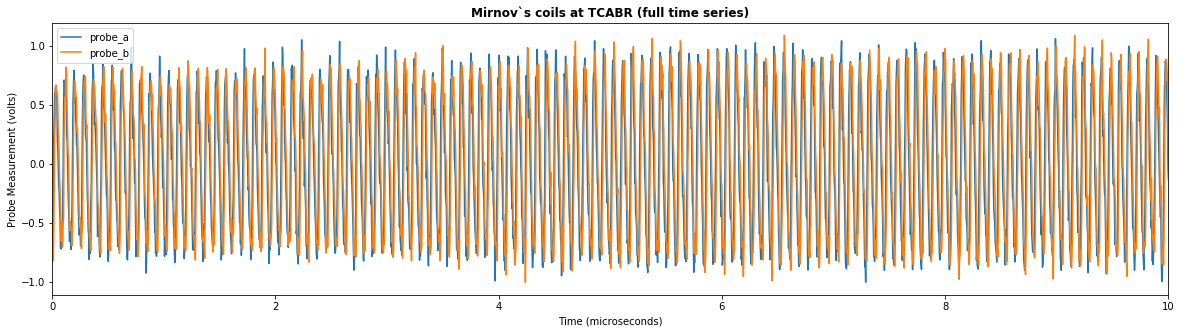

In [4]:
plt.rcParams["figure.figsize"] = (20,5)

fig = plt.figure()
tcabr.plot.line(x='time', y=['probe_a', 'probe_b'])
plt.ylabel("Probe Measurement (volts)")
plt.xlabel("Time (microseconds)")
plt.title("Mirnov`s coils at TCABR (full time series)", fontweight='bold')
plt.savefig('report/images/tcabr_probes_a_b_time_series_all.png', bbox_inches='tight')



<Figure size 1440x360 with 0 Axes>

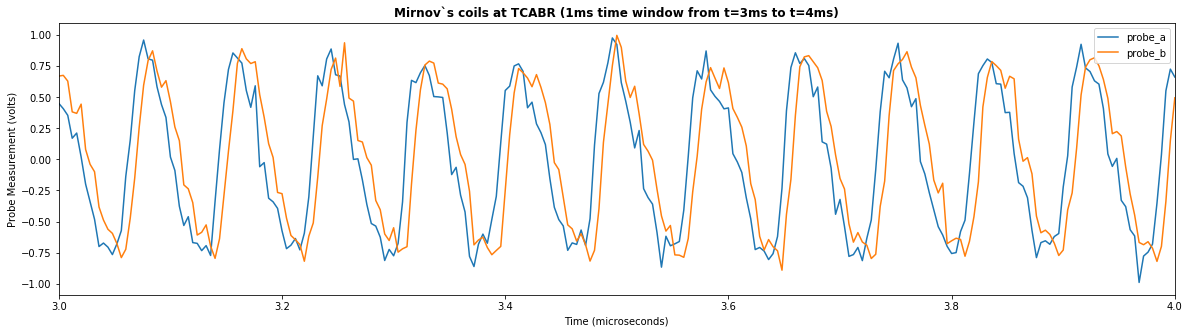

In [5]:
plt.rcParams["figure.figsize"] = (20,5)

fig = plt.figure()
tcabr[(tcabr['time'] >= 3) & (tcabr['time'] <= 4)].plot.line(x='time', y=['probe_a', 'probe_b'])
plt.ylabel("Probe Measurement (volts)")
plt.xlabel("Time (microseconds)")
plt.title("Mirnov`s coils at TCABR (1ms time window from t=3ms to t=4ms)", fontweight='bold')
plt.savefig('report/images/tcabr_probes_a_b_time_series_1ms.png', bbox_inches='tight')


### Valores Médios do Fluxo Magnético

Cálculo dos valores médios do fluxo magnético medido nas bobinas, juntamente do desvio quadrático médio. 

**Nota:** Não está claro se os sinais medidos nas sondas correspondem a potencial elétrico ou ao fluxo magnético. O exercício foi feito considerando que já é o fluxo magnético calculado. 

#### Valores Médios

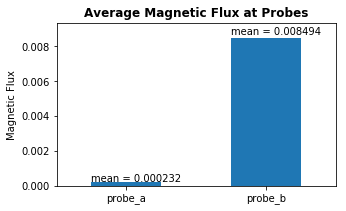

In [6]:
plt.rcParams["figure.figsize"] = (5,3)
fig = plt.figure()
ax = tcabr[['probe_a', 'probe_b']].mean().plot.bar()
plt.title("Average Magnetic Flux at Probes", fontweight='bold')
plt.ylabel("Magnetic Flux")
plt.ylim([0, max(tcabr['probe_a'].mean(), tcabr['probe_b'].mean()) * 1.1])
plt.xticks(rotation=0)
plt.savefig('report/images/average_flux_probes_a_b.png', bbox_inches='tight')

for p in ax.patches:
    ax.annotate("mean = " + str(round(p.get_height(), 6)), (p.get_x() * 1, p.get_height() * 1.02))


#### Desvio quadrático médio

Calculo realizado em comparação com a média dos valores para cada sonda.

In [9]:
mse_dataset = tcabr.copy()

mse_dataset['probe_a_mean'] = tcabr['probe_a'].mean()
mse_dataset['probe_b_mean'] = tcabr['probe_b'].mean()

mse_dataset['probe_a_flotation'] = mse_dataset['probe_a'] - mse_dataset['probe_a_mean']
mse_dataset['probe_b_flotation'] = mse_dataset['probe_b'] - mse_dataset['probe_b_mean']

mse_probe_a = np.mean(mse_dataset['probe_a_flotation'].values ** 2) / len(mse_dataset['probe_a_flotation'].values)
mse_probe_b = np.mean(mse_dataset['probe_b_flotation'].values ** 2) / len(mse_dataset['probe_b_flotation'].values)

print("MSE Probe A: {:0.8f} | MSE Probe B: {:0.8f}".format(mse_probe_a, mse_probe_b))

MSE Probe A: 0.00013474 | MSE Probe B: 0.00013412


### Correlação Cruzada

Janela de tempo utilizada: `(t > 3ms) & (t < 5ms)` centrada em `t = 4ms`


In [81]:
cr_dataset = tcabr.copy()
cross_correlation = correlate(
    cr_dataset['probe_b'].values,
    cr_dataset['probe_a'].values,
    mode='full' ###(mudar para FULL)
)
cross_correlation = pd.DataFrame(
    {'x':np.arange(-9.996, 10, 0.004), 'cross_correlation': cross_correlation}
)

# Phase difference
cr_dataset['phase_difference'] = cr_dataset['probe_b'] - cr_dataset['probe_a']

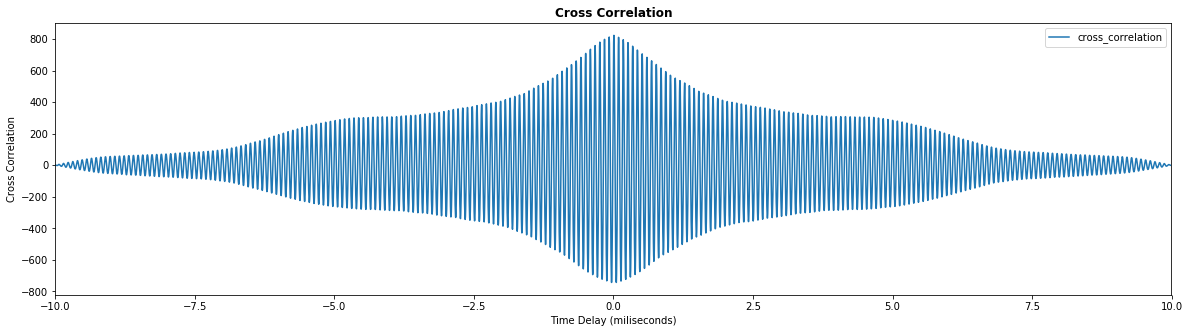

In [127]:
plt.rcParams["figure.figsize"] = (20,5)
cross_correlation.plot(x='x', y='cross_correlation')
plt.title("Cross Correlation", fontweight='bold')
plt.xlabel("Time Delay (miliseconds)")
plt.ylabel("Cross Correlation")
plt.savefig('report/images/tcabr_probes_a_b_cross_correlation_full', bbox_inches='tight')


### Interpretação da Variação da Diferença de Fase n


### Atraso Temporal e Velocidade de Propagação

Atraso temporal para que o pico de correlação esteja centrado em `t = 0`. 


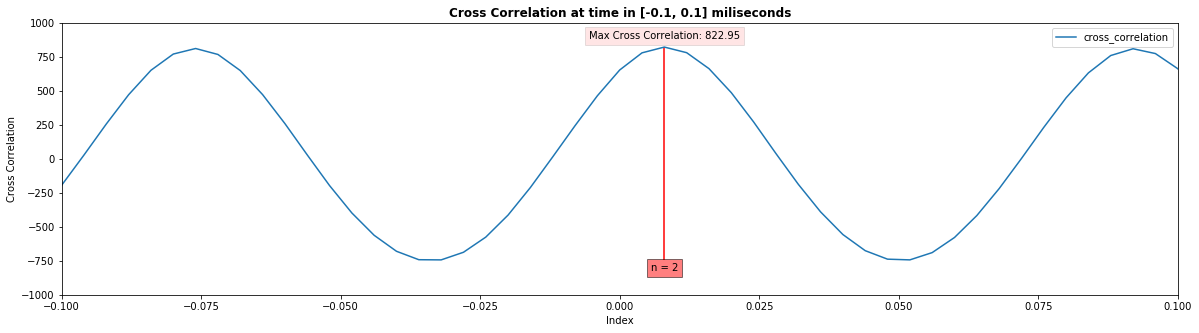

In [118]:
n = cross_correlation['cross_correlation'].idxmax()

plt.rcParams["figure.figsize"] = (20,5)
cross_correlation.plot(x='x', y='cross_correlation', xlim=[-0.1, 0.1], ylim = [-1000, 1000])
plt.title("Cross Correlation at time in [-0.1, 0.1] miliseconds", fontweight='bold')
plt.xlabel("Index")
plt.ylabel("Cross Correlation")
plt.vlines(
    cross_correlation.iloc[n]['x'],
    ymin=cross_correlation['cross_correlation'].min(),
    ymax=cross_correlation['cross_correlation'].max(),
    colors="red",
    linestyles="solid"
)
plt.text(
    x=cross_correlation.iloc[n]['x'],
    y = cross_correlation.iloc[n]['cross_correlation'] * 1.075,
    s="Max Cross Correlation: %.2f" % cross_correlation.iloc[n]['cross_correlation'],
    horizontalalignment='center',
    bbox=dict(facecolor='red', alpha=0.1)
)
plt.text(
    x=cross_correlation.iloc[n]['x'],
    y = - cross_correlation.iloc[n]['cross_correlation'],
    s="n = %.0f" % (cross_correlation.iloc[n]['x'] / 0.004),
    horizontalalignment='center',
    bbox=dict(facecolor='red', alpha=0.5)
)
plt.savefig('report/images/tcabr_probes_a_b_cross_correlation_-1ms_to_1ms', bbox_inches='tight')


Dado que a defasagem encontrada foi de **`n = 2`** atraso temporal obtido é de `n * dt = 2 * 0.004 = 0.008` segundos. Ou seja, **0.08 milisegundos**.

Já a **velocidade de propagação das perturbações** podem ser calculadas pela razão da distância entre as sondas e o atraso temporal. 

In [145]:
print("Propagation`s speed: %.4f [cm/ms]" % (d_probes / (0.004 * n)))
print("Propagation`s speed: %.4f [m/s]" % (10 * d_probes / (0.004 * n)))

Propagation`s speed: 0.0051 [cm/ms]
Propagation`s speed: 0.0510 [m/s]


### Calculo da Autocorrelação e identificacão do período de oscilação
- Calculo feito usando a sonda a;
- Correlação cruzada do sinal da sonda a com a sonda a.




In [149]:
autocorrelation = correlate(
    cr_dataset['probe_a'].values,
    cr_dataset['probe_a'].values,
    mode='full'
)
autocorrelation = pd.DataFrame(
    {'x':np.arange(-9.996, 10, 0.004), 'autocorrelation': autocorrelation}
)

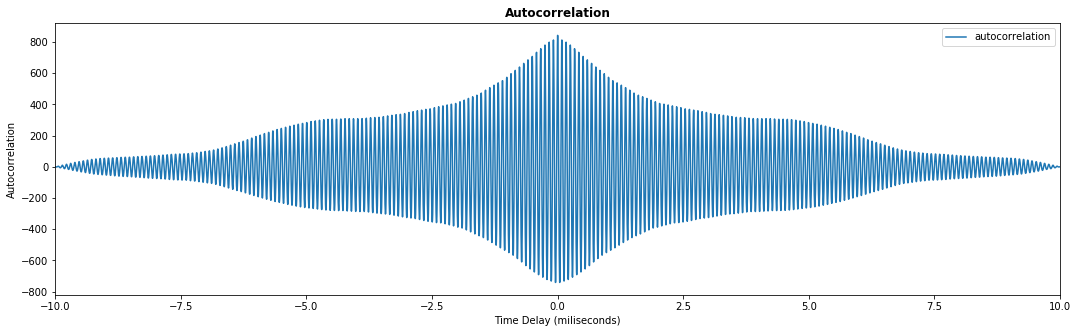

In [152]:
plt.rcParams["figure.figsize"] = (18,5)
autocorrelation.plot(x='x', y='autocorrelation')
plt.title("Autocorrelation", fontweight='bold')
plt.xlabel("Time Delay (miliseconds)")
plt.ylabel("Autocorrelation")
plt.savefig('report/images/tcabr_probe_a_a_autocorrelation_full', bbox_inches='tight')

O período de oscilação será o tempo entre quaisqueres dois picos (ou dois vales) na serie acima. Para visualização, vamos observar o gráfico na janela de tempo de 0.1 ms.


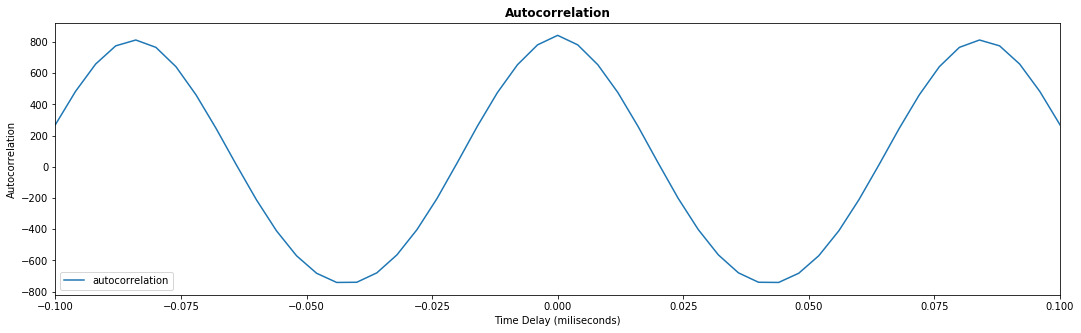

In [156]:
plt.rcParams["figure.figsize"] = (18,5)
autocorrelation.plot(x='x', y='autocorrelation', xlim=[-0.1, 0.1])
plt.title("Autocorrelation", fontweight='bold')
plt.xlabel("Time Delay (miliseconds)")
plt.ylabel("Autocorrelation")
plt.savefig('report/images/tcabr_probe_a_a_autocorrelation_-1ms_1ms', bbox_inches='tight')

Vamos calcular a distância entre os picos, encontrando os ídices dos mesmos. Com isso, calcula-se a distância (em tempo) do ponto de máximo da autocorrelação.
Dessa forma, o valor do período encontra-se na posição (len() + 1) / 2 do vetor de distâncias.

In [197]:
peaks = list(find_peaks(autocorrelation['autocorrelation'])[0])
argmax = autocorrelation['autocorrelation'].idxmax()

distances = [x - autocorrelation.iloc[argmax]['x'] for x in autocorrelation.iloc[peaks]['x']]

print("Oscilation period: %.4f miliseconds" % distances[int((len(distances) + 1) / 2)])

Oscilation period: 0.0840 miliseconds


### Frequência fundamental, velocidade de propagação e número de onda

## Ondas no Texas HELIMAK

In [11]:
# Load data from csv file

helimak = pd.read_csv(data_path + "HELIMAK.csv", dtype=dtypes).dropna()

### Resolução Temporal (frequência de aquisição)

- Corresponde ao número de acquisições por unidade de tempo (segundos)

In [12]:
frequency = helimak['time'].count() / (helimak['time'].max() * 0.001)

print(frequency)

500000.0


por tanto, a resolução temporal das sondas é de 500kHz.

### Representação gráfica das séries temporais referentes a cada sonda

- Janela de tempo de 1ms utilizada, entre t=3.0s e t=4.0s

<Figure size 1440x360 with 0 Axes>

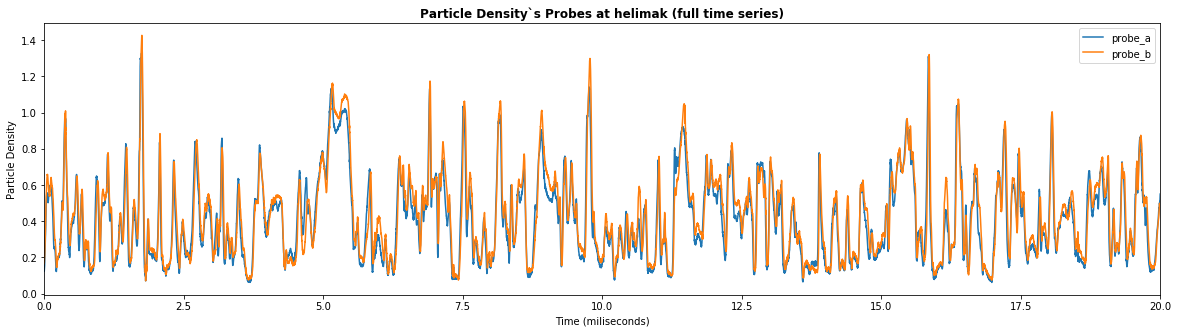

In [24]:
plt.rcParams["figure.figsize"] = (20,5)

fig = plt.figure()
helimak.plot.line(x='time', y=['probe_a', 'probe_b'])
plt.ylabel("Particle Density")
plt.xlabel("Time (miliseconds)")
plt.title("Particle Density`s Probes at helimak (full time series)", fontweight='bold')
plt.savefig('report/images/helimak_probes_a_b_time_series_all.png', bbox_inches='tight')

<Figure size 1440x360 with 0 Axes>

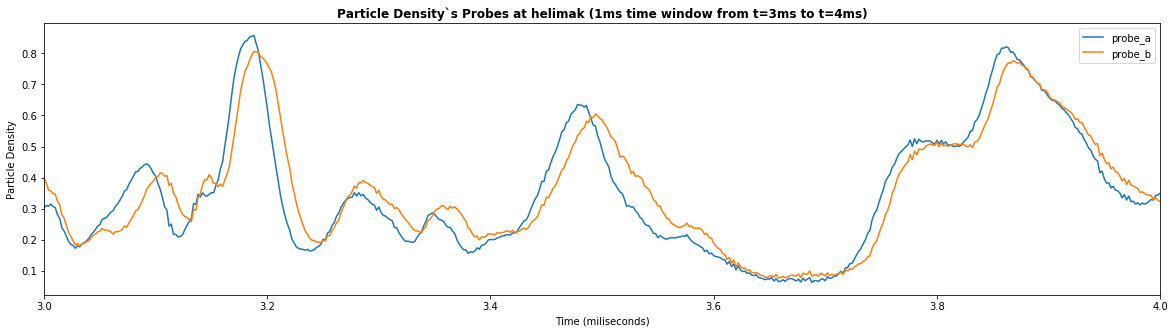

In [23]:
plt.rcParams["figure.figsize"] = (20,5)

fig = plt.figure()
helimak[(helimak['time'] >= 3) & (helimak['time'] <= 4)].plot.line(x='time', y=['probe_a', 'probe_b'])
plt.ylabel("Particle Density")
plt.xlabel("Time (miliseconds)")
plt.title("Particle Density`s Probes at helimak (1ms time window from t=3ms to t=4ms)", fontweight='bold')
plt.savefig('report/images/helimak_probes_a_b_time_series_1ms.png', bbox_inches='tight')


### Valores Médios do Fluxo Magnético

Cálculo dos valores médios do fluxo magnético medido nas bobinas, juntamente do desvio quadrático médio. 

**Nota:** Não está claro se os sinais medidos nas sondas correspondem a potencial elétrico ou ao fluxo magnético. O exercício foi feito considerando que já é o fluxo magnético calculado. 

#### Valores Médios

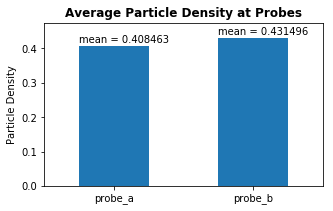

In [20]:
plt.rcParams["figure.figsize"] = (5,3)
fig = plt.figure()
ax = helimak[['probe_a', 'probe_b']].mean().plot.bar()
plt.title("Average Particle Density at Probes", fontweight='bold')
plt.ylabel("Particle Density")
plt.ylim([0, max(helimak['probe_a'].mean(), helimak['probe_b'].mean()) * 1.1])
plt.xticks(rotation=0)
plt.savefig('report/images/average_density_probes_a_b.png', bbox_inches='tight')

for p in ax.patches:
    ax.annotate("mean = " + str(round(p.get_height(), 6)), (p.get_x() * 1, p.get_height() * 1.02))

#### Desvio quadrático médio

Calculo realizado em comparação com a média dos valores para cada sonda.


In [17]:
mse_dataset = helimak.copy()

mse_dataset['probe_a_mean'] = helimak['probe_a'].mean()
mse_dataset['probe_b_mean'] = helimak['probe_b'].mean()

mse_dataset['probe_a_flotation'] = mse_dataset['probe_a'] - mse_dataset['probe_a_mean']
mse_dataset['probe_b_flotation'] = mse_dataset['probe_b'] - mse_dataset['probe_b_mean']

mse_probe_a = np.mean(mse_dataset['probe_a_flotation'].values ** 2) / len(mse_dataset['probe_a_flotation'].values)
mse_probe_b = np.mean(mse_dataset['probe_b_flotation'].values ** 2) / len(mse_dataset['probe_b_flotation'].values)

print("MSE Probe A: {:0.8f} | MSE Probe B: {:0.8f}".format(mse_probe_a, mse_probe_b))

MSE Probe A: 0.00000528 | MSE Probe B: 0.00000545


### Correlação Cruzada

Janela de tempo utilizada: `(t > 3ms) & (t < 5ms)` centrada em `t = 4ms`


In [18]:
cr_dataset = helimak.copy()
cr_dataset['cross_correlation']= correlate(
    cr_dataset['probe_a'].values,
    cr_dataset['probe_b'].values,
    mode='same'
)

# Phase difference
cr_dataset['phase_difference'] = cr_dataset['probe_b'] - cr_dataset['probe_a']

<Figure size 1440x360 with 0 Axes>

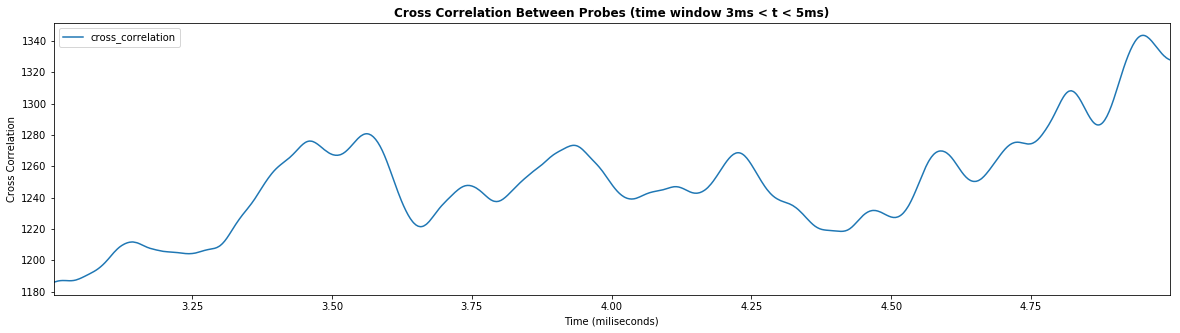

In [19]:
plt.rcParams["figure.figsize"] = (20,5)
fig = plt.figure()
cr_dataset[(helimak['time'] > 3) & (helimak['time'] < 5)].plot.line(x='time', y='cross_correlation')
plt.title("Cross Correlation Between Probes (time window 3ms < t < 5ms)", fontweight='bold')
plt.ylabel("Cross Correlation")
plt.xlabel("Time (miliseconds)")
plt.savefig('report/images/helimak_probes_a_b_cross_correlation_3ms_5ms', bbox_inches='tight')
